###1 Importing dependencies

In [ ]:
import pandas as pd                   # Alias digunakan untuk mempermudah kita memanggil software library dan methods didalamnya
import numpy as np                    # Numpy adalah paket dasar untuk komputasi ilmiah di python
from math import sqrt                 # memanggil function sqrt, operasi matematika akar
from pandas import Series             # function Series seperti aray 1 dimensi (dengan axis sebagai index) untuk menyimpan berbagai
                                      #tipe data, seperti integer, string, float, python objects, etc.

from matplotlib import pyplot         # pyplot adalah sekumpulan fungsi dari matplotlib yang membuatnya bekerja seperti halnya MATLAB.
from matplotlib.pyplot import figure  # figure memberikan identifier unik untuk sebuah gambar grafik dari pyplot
import matplotlib.pyplot as plt       # matplotlib adalah library komprehensif untuk membuat visualisasi statis, animasi, maupun interaktif di Python
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') # menetapkan format gambar grafik dg ukuran (16,12), dpi=80, facecolor=white, edgecolor=black
from matplotlib.pylab import rcParams # rc (runtime configuration) parameters, untuk merubah tampilan visual output matplotlib secara interaktif, 
                                      # (misal ubah warna, jenis garis untuk grafik dll)

import statsmodels.api as sm          # modul berisikan classes dan functions digunakan untuk estimasi model-model statistik, uji tes statistik, dan eksplorasi data.
import statsmodels.tsa.api as smt     # digunakan untuk mengakses Time-series models dan methods pd librari statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt  # mengakses 3 modul holt-winters di modul time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose #mengakses modul seasonal decompose pada modul time series analysis
from statsmodels.tsa.stattools import adfuller # mengakses function Augmented Dickey-Fuller unit root test. 
from statsmodels.tsa.arima_model import ARIMA  # mengakses function ARIMA
import statsmodels.formula.api as smf # digunakan untuk menentukan model dengan formula strings dan DataFrames.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

from datetime import datetime         
import warnings                       # built-in modul untuk menghandle message dari issue warning, jika ada package yg obsolete
warnings.filterwarnings('ignore')     # filter untuk mengabaikan tipe warning
import sys                            # mengakses built-in function pada Python (args maupun keyword-args)
import itertools                      # digunakan iterasi pada struktur data yang dapat ditulis ulang menggunakan for-loop. 
                                      # Struktur data seperrti ini juga dikenal sebagai iterables
import seaborn as sns                 # Adalah library visualisasi data di Python yg berdasarkan matplotlib
%matplotlib inline   


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### 2 Uploading the data into notebook

In [ ]:
data=pd.read_csv('/content/Month_Value_1.csv')
data

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
91,2022-08,NaN,NaN,NaN,NaN
92,2022-09,NaN,NaN,NaN,NaN
93,2022-10,NaN,NaN,NaN,NaN
94,2022-11,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(96, 5)

In [ ]:
data.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


In [ ]:
data.size

480

In [ ]:
data.dtypes

Period                                       object
Revenue                                     float64
Sales_quantity                              float64
Average_cost                                float64
The_average_annual_payroll_of_the_region    float64
dtype: object

###3 Data Exploration

In [ ]:
# Cek missing value dari masing masing kolom
print(data.isnull().sum())

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64


In [ ]:
# dropna akan membuang baris yang didalamnya ada missing value
data.dropna()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
59,2019-12,5.875647e+07,38069.0,1543.420464,29878525.0
60,2020-01,5.628830e+07,27184.0,2070.640850,29044998.0
61,2020-02,4.022524e+07,23509.0,1711.057181,29044998.0
62,2020-03,5.002217e+07,32569.0,1535.882748,29044998.0


In [ ]:
df = data.dropna()
df

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
59,2019-12,5.875647e+07,38069.0,1543.420464,29878525.0
60,2020-01,5.628830e+07,27184.0,2070.640850,29044998.0
61,2020-02,4.022524e+07,23509.0,1711.057181,29044998.0
62,2020-03,5.002217e+07,32569.0,1535.882748,29044998.0


In [ ]:
df=df[['Period','Sales_quantity']]
df=df.reset_index(drop=True)
df.head()

,Period,Sales_quantity
0,2015-01,12729.0
1,2015-02,11636.0
2,2015-03,15922.0
3,2015-04,15227.0
4,2015-05,8620.0


In [ ]:
df['Period']=pd.to_datetime(df['Period'], infer_datetime_format=True)
df=df.set_index(['Period'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2015-01-01 to 2020-04-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sales_quantity  64 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


In [ ]:
df.loc[df['Sales_quantity']==min(df['Sales_quantity'])]

,Sales_quantity
Period,
2016-08-01,8314.0


In [ ]:
df.loc[df['Sales_quantity']==max(df['Sales_quantity'])]

,Sales_quantity
Period,
2019-12-01,38069.0


In [ ]:
df.shape

(64, 1)

In [ ]:
df.columns

Index(['Sales_quantity'], dtype='object')

In [ ]:
df.describe()

,Sales_quantity
count,64.000000
mean,19197.375000
std,6591.287257
min,8314.000000
25%,15065.500000
50%,18368.000000
75%,22856.250000
max,38069.000000


####4 Data Analysis

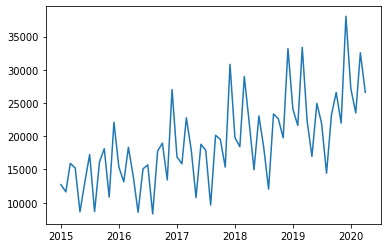

In [ ]:
plt.plot(df.Sales_quantity)
figsize=(20,20)

Dari data tersebut dapat diketahui bahwa pola data ialah musiman dan memiliki trend naik.


**> Stationarity Check-Rolling Statistic Test**



In [ ]:
rolmean=df.rolling(window=12).mean()
print(rolmean.head(15))

            Sales_quantity
Period                    
2015-01-01             NaN
2015-02-01             NaN
2015-03-01             NaN
2015-04-01             NaN
2015-05-01             NaN
2015-06-01             NaN
2015-07-01             NaN
2015-08-01             NaN
2015-09-01             NaN
2015-10-01             NaN
2015-11-01             NaN
2015-12-01    14201.916667
2016-01-01    14421.583333
2016-02-01    14548.000000
2016-03-01    14749.416667


In [ ]:
rolstd=df.rolling(window=12).std()
print(rolstd.head(15))

            Sales_quantity
Period                    
2015-01-01             NaN
2015-02-01             NaN
2015-03-01             NaN
2015-04-01             NaN
2015-05-01             NaN
2015-06-01             NaN
2015-07-01             NaN
2015-08-01             NaN
2015-09-01             NaN
2015-10-01             NaN
2015-11-01             NaN
2015-12-01     4026.683690
2016-01-01     4010.896918
2016-02-01     3938.369413
2016-03-01     4074.480122


[teks link]disini kita melakukan rolling terhadap rata-rata dan standar deviasi untuk mengecek apakah series ini stasioner atau tidak

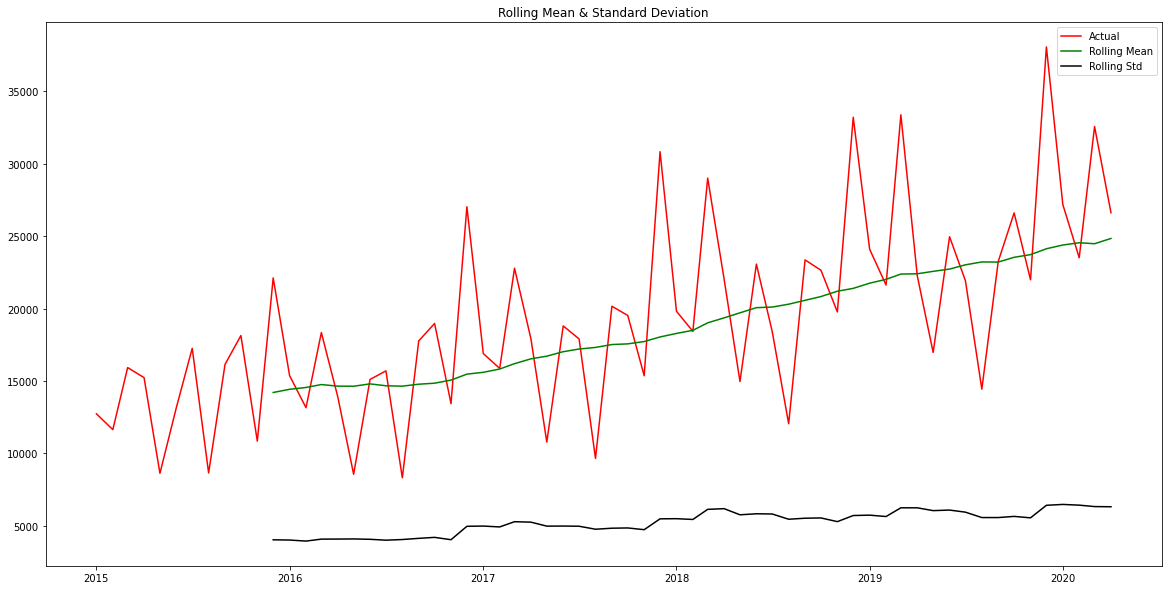

In [ ]:
plt.figure(figsize=(20,10))
actual=plt.plot(df, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

pada grafik diatas kita melihat bahwa data actual dan rolling (mean dan std) cukup berbeda dimana grafik cenderung meningkat terhadap waktu, menandakan bahwa series ini tidak stasioner

**> Stationarity Check - Augmented Dickey-Fuller (ADF) test**

---





HO= Data Tidak Stasioner
H1= Data Stasioner

p-value< 0,05 (alpha) dan nilai ADF< critical value maka tolak HO, artinya time series stasioner

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(df['Sales_quantity'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           1.157056
p-value                  0.995675
Lags Used               11.000000
No. of Obs              52.000000
Critical Value (1%)     -3.562879
Critical Value (5%)     -2.918973
Critical Value (10%)    -2.597393
dtype: float64


>Nilai ADF statistic yang lebih besar dari critical values pada semua level, dan juga p-value yang lebih besar dari 0.05 turut menandakan, kita gagal menolak null hypothesis pada 90%, 95%, and 99% confidence, yang berarti bahwa data time series ini strongly non-stationary. 

*   Berdasarkan insights di atas, maka kita
akan mencoba menstabilkan variance dengan cara log data dengan np.log()

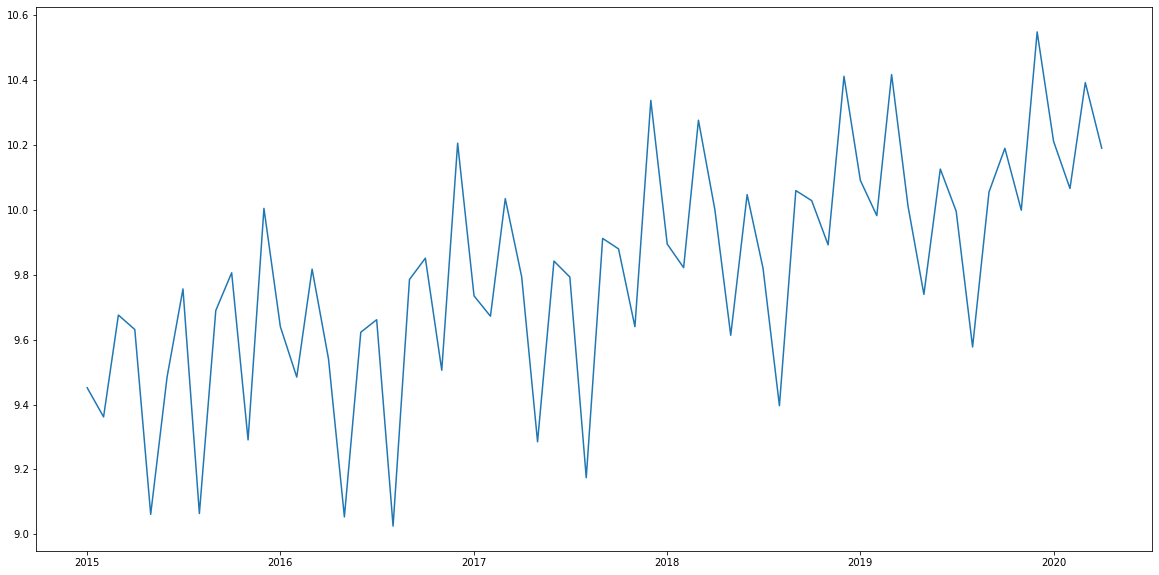

In [ ]:
# Plot dalam bentuk visualisasi line chart dengan menggunakan function numpy np.log
plt.figure(figsize=(20,10))
data_log=np.log(df)
plt.plot(data_log)

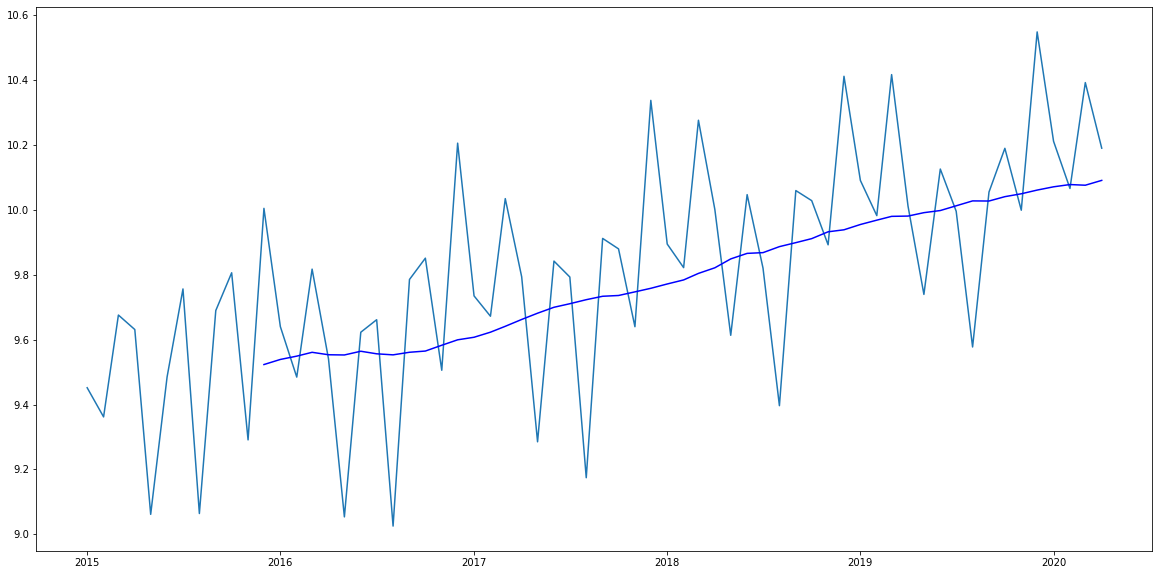

In [ ]:
# Cek secara visual kembali dengan plot data_log dengan rolling window mean dan std. deviation
plt.figure(figsize=(20,10))

MAvg=data_log.rolling(window=12).mean() #disini kita melakukan rolling mean untuk melihat secara visual apakah series ini stationary atau tidak
MStd=data_log.rolling(window=12).std()

plt.plot(data_log)
plt.plot(MAvg, color='blue') #nilai rolling mean
#plt.plot(MStd, color='red') #nilai rolling std

In [ ]:
# Hitung difference dari data_log dengan MAvg
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Sales_quantity
Period,
2015-01-01,NaN
2015-02-01,NaN
2015-03-01,NaN
2015-04-01,NaN
2015-05-01,NaN
2015-06-01,NaN
2015-07-01,NaN
2015-08-01,NaN
2015-09-01,NaN


In [ ]:
# Melakukan dropna untuk menghilang missing value
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Sales_quantity
Period,
2015-12-01,0.480866
2016-01-01,0.101108
2016-02-01,-0.064546
2016-03-01,0.256057
2016-04-01,-0.012893


In [ ]:
# Buat function stationarity untuk menampilkan multiple line chart dari actual, rolling mean, dan rolling std.deviasi
# yang juga berisikan hasil tes dari Dickey-Fuller
def stationarity(timeseries):
    from statsmodels.tsa.stattools import adfuller
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Sales_quantity'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

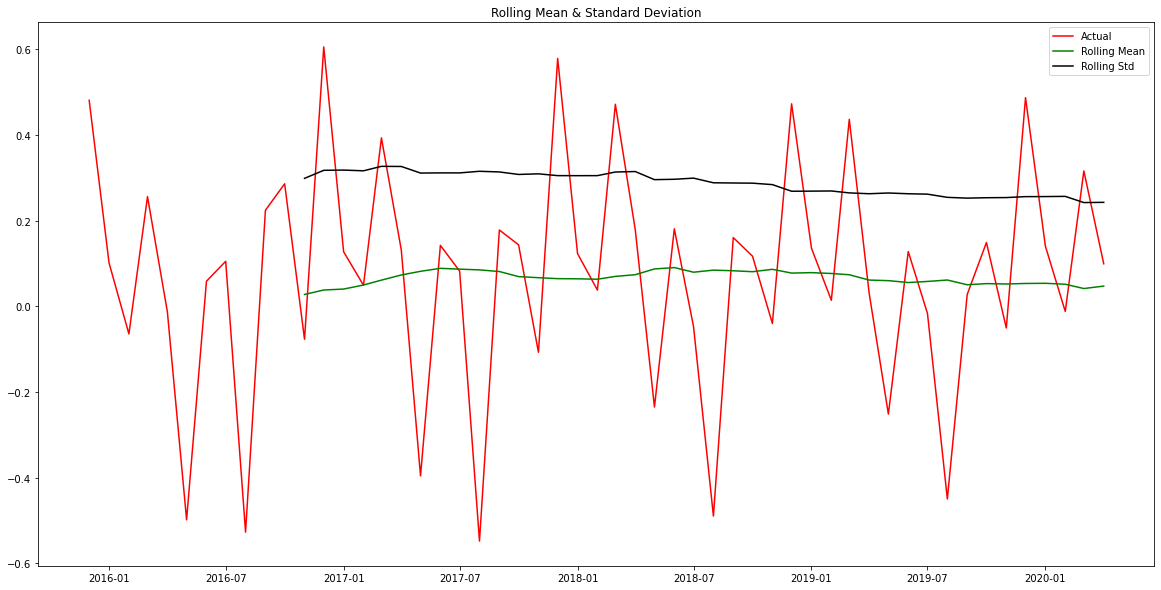

Dickey-Fuller Test: 
Test Statistic          -1.984851
p-value                  0.293255
Lags Used               11.000000
No. of Obs              41.000000
Critical Value (1%)     -3.600983
Critical Value (5%)     -2.935135
Critical Value (10%)    -2.605963
dtype: float64


In [ ]:
stationarity(data_log_diff)

Dalam Dickey-Fuller test didapatkan :

*   t-value (-1.984851) > DF critical value 1% (-3.600983), DF critical value 5% (-2.935135, DF critical value 10% (-2.605963)
*   p-value (0.293255) > 0.05

Hal ini menunjukkan bahwa kita gagal menolak H0 (accept H0) artinya series ini tidak stasioner.

Kita dapat mencoba lagi dengan menggunakan Exponentially Weighted Moving Average (function ewm), karena melalui EWM memberikan lebih banyak bobot kepada observasi terbaru sehingga dapat menangkap tren terkini secara lebih cepat

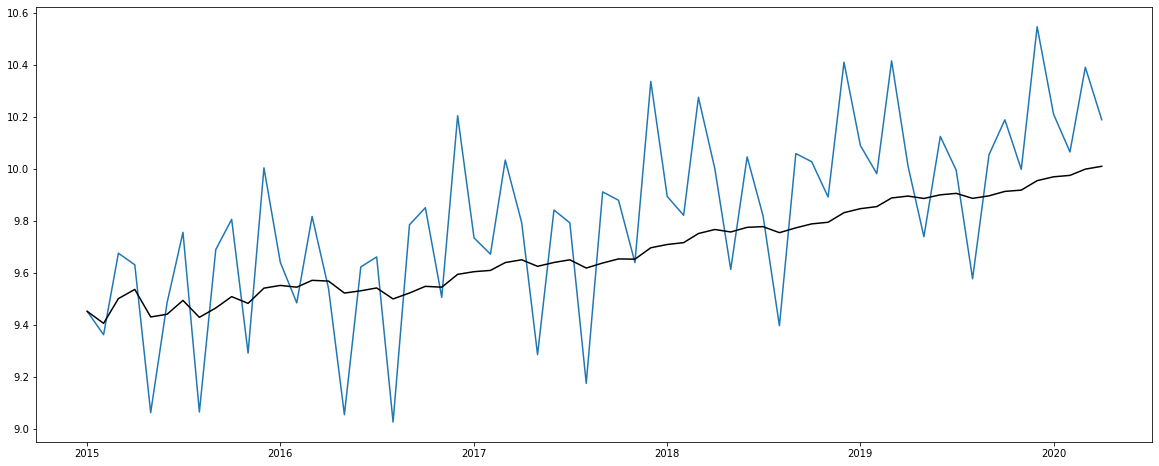

In [ ]:
plt.figure(figsize=(20,8))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean() 
plt.plot(data_log)
plt.plot(exp_data, color='black')

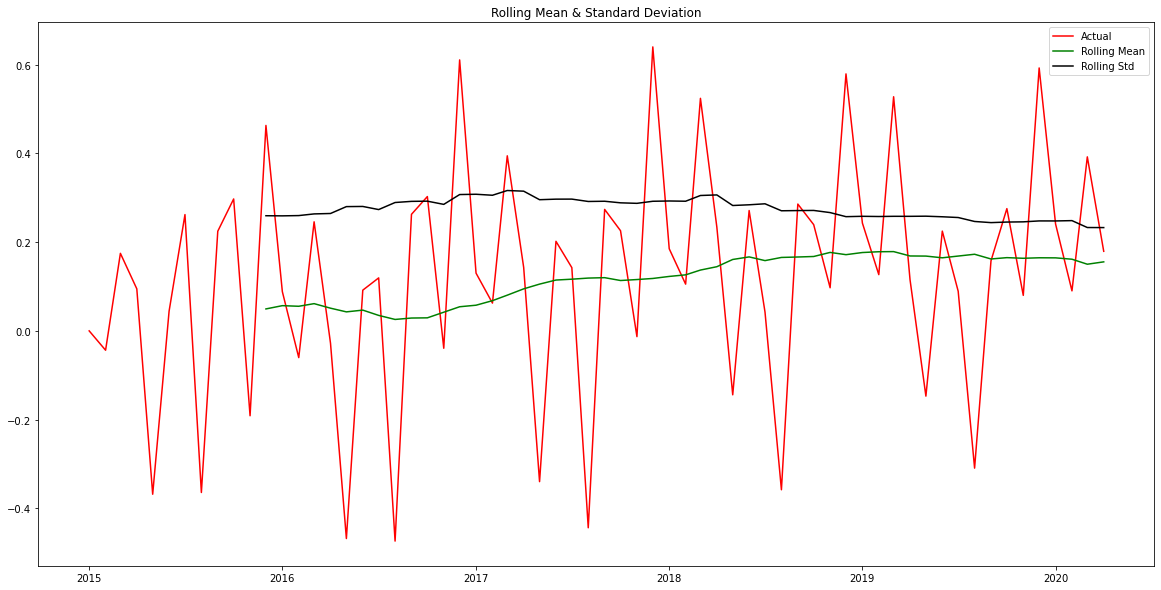

Dickey-Fuller Test: 
Test Statistic          -0.944546
p-value                  0.772949
Lags Used               11.000000
No. of Obs              52.000000
Critical Value (1%)     -3.562879
Critical Value (5%)     -2.918973
Critical Value (10%)    -2.597393
dtype: float64


In [ ]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

Dalam Dickey-Fuller test ini didapatkan : 

*   t-value (-0.944546) > DF critical value 1% (-3.562879), 5% (-2.918973), 10% (-2.597393)
*   p value (0.772949)> 0.05 

Maka kita gagal menolak HO, artinya data tidak stasioner

**> Stationarity Check - Shift test**



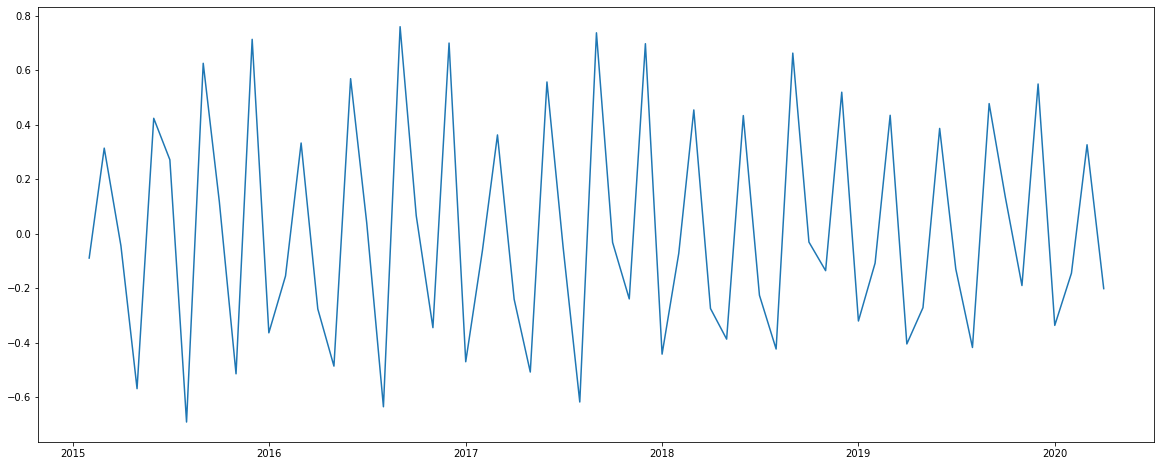

In [ ]:
plt.figure(figsize=(20,8))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

In [ ]:
# Check missing value
data_shift.isna().sum()

Sales_quantity    1
dtype: int64

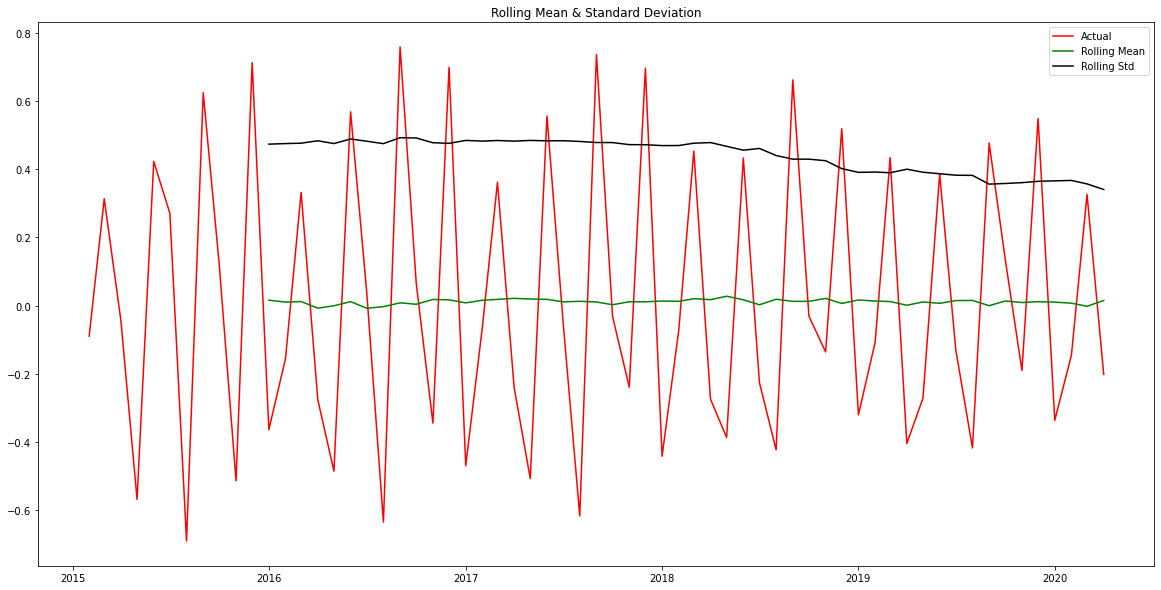

Dickey-Fuller Test: 
Test Statistic          -3.797344
p-value                  0.002935
Lags Used               11.000000
No. of Obs              51.000000
Critical Value (1%)     -3.565624
Critical Value (5%)     -2.920142
Critical Value (10%)    -2.598015
dtype: float64


In [ ]:
data_shift=data_shift.dropna()
stationarity(data_shift)

Dari data shift diatas didapatkan:
 ADF test menunjukkan p-value < 0.05 

*   p-value (0.002935) < 0.05
*   t-test (-3.797.344) < critical value 1% (-3.565624), 5% (-2.920142), 10%(-2.598015)

Maka tolak HO yang mengindikasikan bahwa series ini stasioner

> **Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)**

*   ACF merupakan korelasi antar data di dalam time series tersebut yang dipisahkan dalam lag dimana (Xt , Xk+t) dengan k adalah jumlah lag dan t adalah nilainya. ACF merata-ratakan data berdasarkan berjalan berdasarkan waktu (Moving Average).
*   PACF juga menghitung korelasi antar data di time series. Perbedaannya, PACF juga menghitung korelasi antara Xt dan Xt+k namun sebelumnya menghilangkan data antara Xt dan Xt+k terlebih dahulu. Berarti data yang dihilangkan adalah data Xt+1 sampai dengan Xt+k-1 . PACF melihat data terhadap waktu sebelumnya (Auto Corelation) 



Text(0.5, 1.0, 'Partial Autocorrelation Function / PACF')

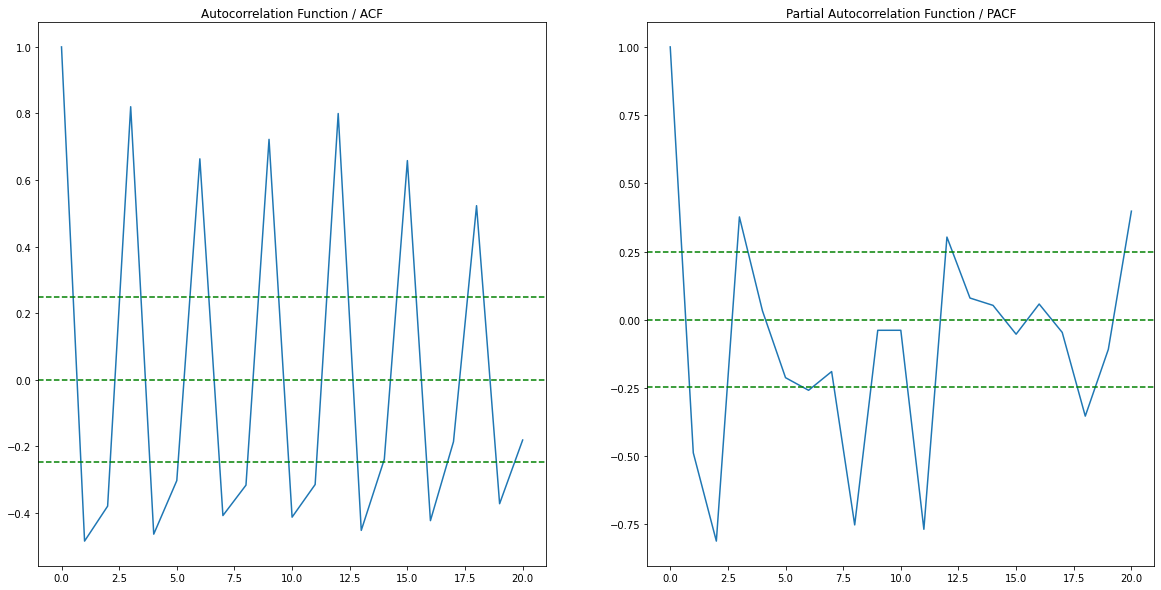

In [ ]:
# dari module time series analysis, import function acf dan pacf
# ACF = Auto Correlation Function
# PACF = Partial Auto Correlation Function
from statsmodels.tsa.stattools import acf, pacf 

# terapkan function acf dan pcf pada data_shift yang sudah dibuat
lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

# Format grafik dan visualisasikan ACF
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Autocorrelation Function / ACF')

# Format grafik dan visualisasikan PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Partial Autocorrelation Function / PACF')

Dari grafik di atas terlihat bahwa grafik time series (berwarna biru )berpotongan dengan grafik shift time series (dlm hal ini dengan lag=20), 
sehingga dapat dikatakan bahwa grafik time series ini mengalami efek auto correlation

> Forecasting



Model Development

Pada Model Development terdapat 2 model time series yaitu
1. Holt Winters
2. SARIMAX (pada dasarnya ARIMA yang memang spesifik menghadapai seasonal effect)

In [ ]:
# Split the data untuk 29 month test
train = df[0:int(len(df)*0.80)]   #train data sebesar 80%
test = df[int(len(df)*0.80):]     #test data sebesar 20%

In [ ]:
train

,Sales_quantity
Period,
2015-01-01,12729.0
2015-02-01,11636.0
2015-03-01,15922.0
2015-04-01,15227.0
2015-05-01,8620.0
2015-06-01,13160.0
2015-07-01,17254.0
2015-08-01,8642.0
2015-09-01,16144.0


In [ ]:
test

,Sales_quantity
Period,
2019-04-01,22265.0
2019-05-01,16967.0
2019-06-01,24958.0
2019-07-01,21917.0
2019-08-01,14431.0
2019-09-01,23253.0
2019-10-01,26603.0
2019-11-01,21987.0
2019-12-01,38069.0


1. HoltWinters

In [ ]:
model_data = ExponentialSmoothing(np.asarray(train['Sales_quantity']),seasonal_periods=24, trend='add',seasonal='mul').fit(optimized=True)

In [ ]:
#copy periode untuk test dan assign ke data_Holt
data_Holt = test.copy()
data_Holt

,Sales_quantity
Period,
2019-04-01,22265.0
2019-05-01,16967.0
2019-06-01,24958.0
2019-07-01,21917.0
2019-08-01,14431.0
2019-09-01,23253.0
2019-10-01,26603.0
2019-11-01,21987.0
2019-12-01,38069.0


In [ ]:
data_Holt['Holt'] = model_data.forecast(len(test['Sales_quantity']))

In [ ]:
data_Holt.tail()

,Sales_quantity,Holt
Period,,
2019-12-01,38069.0,39775.264344
2020-01-01,27184.0,26098.964594
2020-02-01,23509.0,23326.163355
2020-03-01,32569.0,35258.375959
2020-04-01,26615.0,26628.304953


In [ ]:
#params untuk mengubah data pada variabel model_data menjadi sebuah dictionary
model_data.params 

{'damping_slope': nan,
 'initial_level': 17904.660642306262,
 'initial_seasons': array([0.69640986, 0.62829193, 0.92546802, 0.74635232, 0.42537396,
        0.70409931, 0.74809349, 0.37820532, 0.75270565, 0.76782168,
        0.52441319, 1.06051498, 0.69130009, 0.61382556, 0.92180859,
        0.69169876, 0.44850887, 0.71235175, 0.61008055, 0.36228477,
        0.72444878, 0.72054604, 0.57526396, 1.02469008]),
 'initial_slope': 203.32044335736222,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.4884576097900265,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.0071477743479859655,
 'use_boxcox': False}

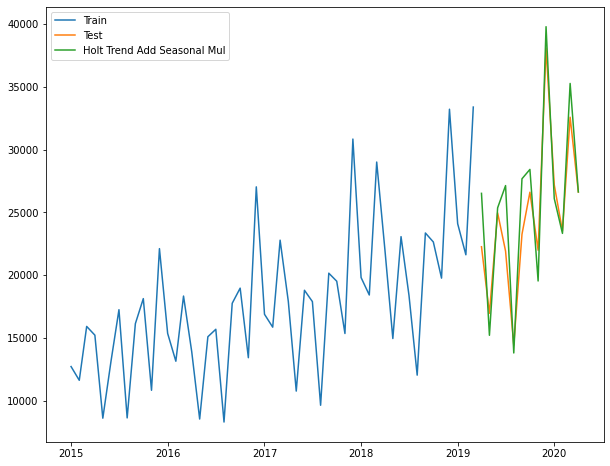

In [ ]:
# visualisasi hasil forecast dari model HoltWinters dengan data aktual
plt.figure(figsize=(10,8))
plt.plot(train['Sales_quantity'], label='Train')
plt.plot(test['Sales_quantity'], label='Test')
plt.plot(data_Holt['Holt'], label='Holt Trend Add Seasonal Mul')
plt.legend(loc=0)

Dari grafik di atas terlihat bahwa model Holt-winters mulai melakukan prediksi pada 2019-04 sampai 2020-04 yang ditunjukkan oleh garis berwarna orange.

Garis berwarna biru merupakan data yang digunakan untuk train dan garis berwarna merah yang digunakan untuk test.

Model Sarimax

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
train_log = np.log10(train['Sales_quantity'])

In [ ]:
for param in pdq: #Non-Seasonal
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_log,
                                             order = param,
                                             seasonal_order = param_seasonal)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal #Store the best param values : AIC, P, D, Q [Non-S / Seas]
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 model - AIC:-147.82117660938079


In [ ]:
# tampilkan hasil dari SARIMAX
mod = sm.tsa.statespace.SARIMAX(train_log,
                                order=(0,1,1),
                                seasonal_order=(1,0,1,12),
                                enforce_stationarity=True)

best_results = mod.fit()

print(best_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7854      0.119     -6.588      0.000      -1.019      -0.552
ar.S.L12       0.9316      0.044     21.135      0.000       0.845       1.018
ma.S.L12       0.2291      0.267      0.858      0.391      -0.294       0.752
sigma2         0.0014      0.000      4.309      0.000       0.001       0.002


In [ ]:
# Terapkan function get_prediction() pada best_results
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2023-01'), dynamic=True, full_results=True)
pred_dynamic

In [ ]:
pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci 

,lower Sales_quantity,upper Sales_quantity
2023-01-01,4.258819,4.985243


In [ ]:
pred99 = best_results.get_forecast(steps=29, alpha=0.1)
pred99

In [ ]:
# Extract the predicted and true values of our time series
# sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['Salesquantity_Forecast'] = np.power(10, pred99.predicted_mean)

In [ ]:
pred99.predicted_mean

2019-04-01    4.412394
2019-05-01    4.265803
2019-06-01    4.432760
2019-07-01    4.324124
2019-08-01    4.168598
2019-09-01    4.434299
2019-10-01    4.423539
2019-11-01    4.376059
2019-12-01    4.572085
2020-01-01    4.450779
2020-02-01    4.403783
2020-03-01    4.578136
2020-04-01    4.476193
2020-05-01    4.339631
2020-06-01    4.495166
2020-07-01    4.393963
2020-08-01    4.249076
2020-09-01    4.496600
2020-10-01    4.486576
2020-11-01    4.442345
2020-12-01    4.624960
2021-01-01    4.511952
2021-02-01    4.468172
2021-03-01    4.630597
2021-04-01    4.535628
2021-05-01    4.408408
2021-06-01    4.553303
2021-07-01    4.459023
2021-08-01    4.324048
Freq: MS, dtype: float64

In [ ]:
testCopy.tail(10)

,Sales_quantity,Salesquantity_Forecast
Period,,
2019-07-01,21917.0,21092.325923
2019-08-01,14431.0,14743.423114
2019-09-01,23253.0,27183.074818
2019-10-01,26603.0,26517.891453
2019-11-01,21987.0,23771.653964
2019-12-01,38069.0,37332.358568
2020-01-01,27184.0,28234.420685
2020-02-01,23509.0,25338.615900
2020-03-01,32569.0,37856.130028


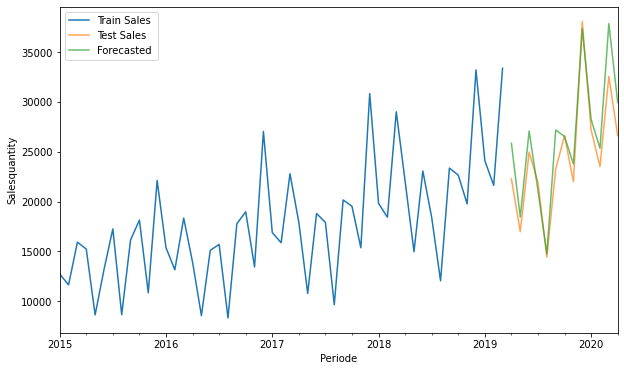

In [ ]:
# visualisasikan dari antara train, test, dan hasil forecast

axis = train['Sales_quantity'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Sales_quantity'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['Salesquantity_Forecast'].plot(ax=axis, label='Forecasted ', alpha=0.7)
axis.set_xlabel('Periode')
axis.set_ylabel('Salesquantity')
plt.legend(loc='best')
plt.show()
plt.close()

Plot Forecast with Confidence Band

In [ ]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
pred_ci_99

,lower Sales_quantity,upper Sales_quantity
2019-04-01,4.338022,4.486766
2019-05-01,4.189738,4.341867
2019-06-01,4.355040,4.510480
2019-07-01,4.244783,4.403466
2019-08-01,4.087668,4.249529
2019-09-01,4.351810,4.516787
2019-10-01,4.339521,4.507557
2019-11-01,4.290540,4.461579
2019-12-01,4.485090,4.659081
2020-01-01,4.362332,4.539226


In [ ]:
pred_ci_95

,lower Sales_quantity,upper Sales_quantity
2019-04-01,4.338022,4.486766
2019-05-01,4.189738,4.341867
2019-06-01,4.355040,4.510480
2019-07-01,4.244783,4.403466
2019-08-01,4.087668,4.249529
2019-09-01,4.351810,4.516787
2019-10-01,4.339521,4.507557
2019-11-01,4.290540,4.461579
2019-12-01,4.485090,4.659081
2020-01-01,4.362332,4.539226


In [ ]:
n_steps = 36
idx = pd.date_range(df.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.tail()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2022-11-01,31922.374056,17844.507311,57106.534104,17844.507311,57106.534104
2022-12-01,47229.993290,26084.602952,85516.818880,26084.602952,85516.818880
2023-01-01,37063.041921,20228.753422,67906.758652,20228.753422,67906.758652
2023-02-01,33740.788349,18203.012794,62541.339244,18203.012794,62541.339244
2023-03-01,47804.535798,25498.239014,89624.763561,25498.239014,89624.763561


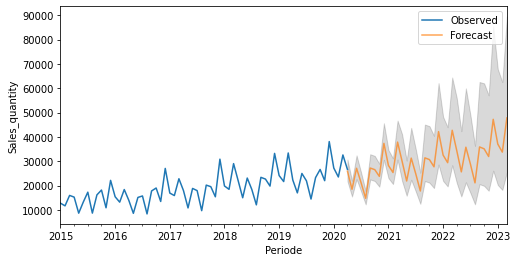

In [ ]:
# plot the forecast along with the confidence band
axis = df['Sales_quantity'].plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Periode')
axis.set_ylabel('Sales_quantity')
plt.legend(loc='best')
plt.show()

> Model Evaluation



Plot ACF and PACF for residuals of SARIMAX model

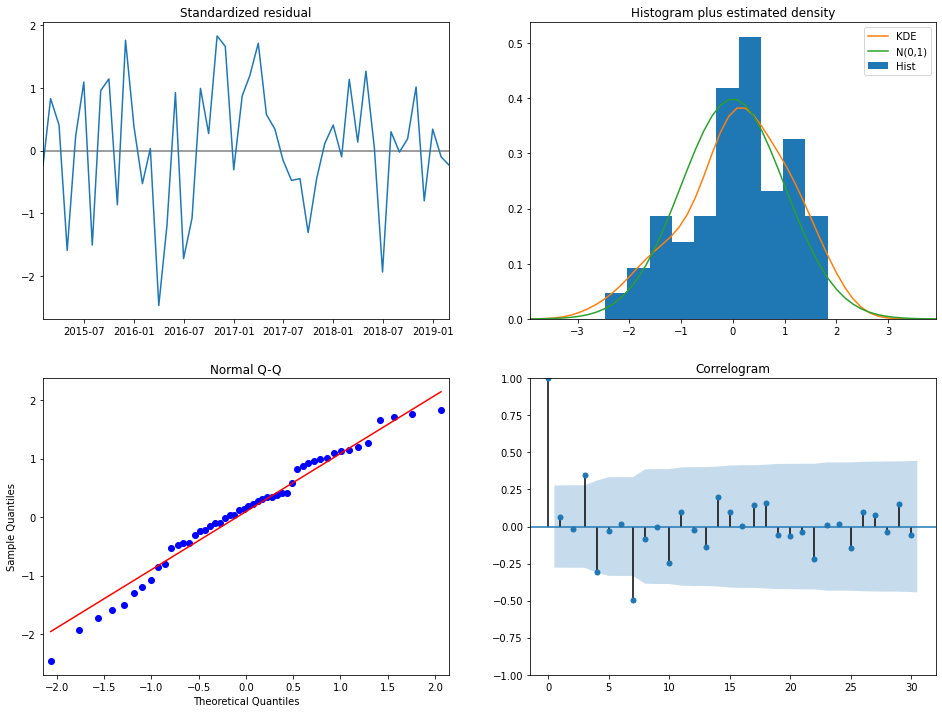

In [ ]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

*   Grafik standardized residuals menunjukkan bahwa sebagian besar titik sudah berada pada y=0 (rentang 2 hingga -2) yang berarti bahwa forecast baik dan tidak menyimpang jauh dari data aktual. 
*   Grafik histogram sudah menunjukkan kecenderungan normal (garis hijau adalah grafik garis dari ujung histogram) dan KDE menunjukkan grafik kecocokan prediksi.
*   Pada Grafik Q-Q menunjukkan bahwa forecast baik karena data kita berada pada garis normal.
*   Pada Grafik Correlogram menunjukkan bahwa forecast baik dan memperlihatkan gambaran apakah terdapat auto-correlation diantara pasangan data pada kurun waktu yang berbeda.




Model performance based on MAE, MSE, RMSE, MAPE

*   Model HoltWinters



In [ ]:
# Hitung MAE pada model HoltWinters menggunakan function yang dibuat dari awal
def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 

# Hitung MAPE pada model HoltWinters
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung MSE dan RMSE pada model HoltWinters
mse = ((test['Sales_quantity'] - data_Holt['Holt']) ** 2).mean()
rmse = np.sqrt(mse)

print('Mean Absolute Error of our forecasts is ', mean_absolute_error(test['Sales_quantity'],data_Holt['Holt']).round(3))
print('Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(test['Sales_quantity'],data_Holt['Holt']).round(2), ' %')
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 3)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

Mean Absolute Error of our forecasts is  2045.655
Mean Absolute Percentage Error of our forecasts is  8.74  %
The Mean Squared Error of our forecasts is 6846051.979
The Root Mean Squared Error of our forecasts is 2616.496


* Model SARIMAX

In [ ]:
# Import module metrics dan panggil functionnya
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = test['Sales_quantity']
y_pred = testCopy['Salesquantity_Forecast']

print('The Mean Absolute Error of our forecasts is ', mean_absolute_error(y_true, y_pred).round(3))
print ('The Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(y_true, y_pred).round(3), '%')
print ('The Mean Squared Error of our forecasts is ', mean_squared_error(y_true, y_pred).round(3))
print ('The Root Mean Squared Error of our forecasts is ', np.sqrt(mean_squared_error(y_true, y_pred)).round(3))


The Mean Absolute Error of our forecasts is  2026.651
The Mean Absolute Percentage Error of our forecasts is  0.082 %
The Mean Squared Error of our forecasts is  6378666.402
The Root Mean Squared Error of our forecasts is  2525.602


* Export hasil model SARIMAX dalam bentuk .CSV